In [55]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\asus\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [56]:

df1 = pd.read_csv(r'C:\Users\asus\Desktop\PatRec\Midterms\data\youtube_spamham/Youtube01-Psy.csv')
df2 = pd.read_csv(r'C:\Users\asus\Desktop\PatRec\Midterms\data\youtube_spamham/Youtube02-KatyPerry.csv')
df3 = pd.read_csv(r'C:\Users\asus\Desktop\PatRec\Midterms\data\youtube_spamham/Youtube03-LMFAO.csv')
df4 = pd.read_csv(r'C:\Users\asus\Desktop\PatRec\Midterms\data\youtube_spamham/Youtube04-Eminem.csv')
df5 = pd.read_csv(r'C:\Users\asus\Desktop\PatRec\Midterms\data\youtube_spamham/Youtube05-Shakira.csv')


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

In [58]:
import pandas as pd
import glob

#Compiling all csv files into one data frame

path = r'C:\Users\asus\Desktop\PatRec\Midterms\data\youtube_spamham' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

C:\Users\asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [59]:
# DATA CLEANING
df = df.drop(["COMMENT_ID"], axis=1)
df['CLASS'] = df['CLASS'].map({0: 'HAM', 1: 'SPAM'})
df.head()

AUTHOR                        DATE  \
0                          dharma pal  2015-05-29T02:30:18.971000   
1                       Tiza Arellano  2015-05-29T00:14:48.748000   
2  Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿  2015-05-28T21:00:08.607000   
3                       Eric Gonzalez  2015-05-28T20:47:12.193000   
4                       Analena López  2015-05-28T17:08:29.827000   

                                             CONTENT CLASS  
0                                         Nice song﻿   HAM  
1                                      I love song ﻿   HAM  
2                                      I love song ﻿   HAM  
3  860,000,000 lets make it first female to reach...   HAM  
4                      shakira is best for worldcup﻿   HAM

In [60]:
# Lets clean it more, by processing the content

# Lets remove the punctuation marks, numbers etc. 

import re
re.findall("[A-Za-z]+", "Hi123Test!")

['Hi', 'Test']

In [61]:
# Make it into all lower case
def process_content(content):
    return " ".join(re.findall("[A-Za-z]+",content.lower()))

In [62]:
df['processed_content'] = df['CONTENT'].apply(process_content)
df.head()

AUTHOR                        DATE  \
0                          dharma pal  2015-05-29T02:30:18.971000   
1                       Tiza Arellano  2015-05-29T00:14:48.748000   
2  Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿  2015-05-28T21:00:08.607000   
3                       Eric Gonzalez  2015-05-28T20:47:12.193000   
4                       Analena López  2015-05-28T17:08:29.827000   

                                             CONTENT CLASS  \
0                                         Nice song﻿   HAM   
1                                      I love song ﻿   HAM   
2                                      I love song ﻿   HAM   
3  860,000,000 lets make it first female to reach...   HAM   
4                      shakira is best for worldcup﻿   HAM   

                                   processed_content  
0                                          nice song  
1                                        i love song  
2                                        i love song  
3  lets make it first female to reach one billion...  
4                       shakira is best for worldcup

In [72]:
df['length'] = df['CONTENT'].apply(len)
df.head()



AUTHOR                        DATE  \
0                          dharma pal  2015-05-29T02:30:18.971000   
1                       Tiza Arellano  2015-05-29T00:14:48.748000   
2  Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿  2015-05-28T21:00:08.607000   
3                       Eric Gonzalez  2015-05-28T20:47:12.193000   
4                       Analena López  2015-05-28T17:08:29.827000   

                                             CONTENT CLASS  \
0                                         Nice song﻿   HAM   
1                                      I love song ﻿   HAM   
2                                      I love song ﻿   HAM   
3  860,000,000 lets make it first female to reach...   HAM   
4                      shakira is best for worldcup﻿   HAM   

                                   processed_content  length  
0                                          nice song      10  
1                                        i love song      13  
2                                        i love song      13  
3  lets make it first female to reach one billion...      86  
4                       shakira is best for worldcup      29

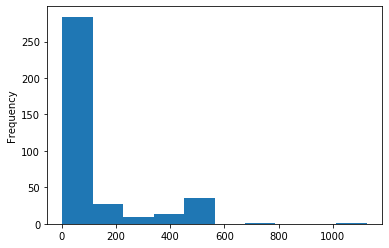

In [73]:
df['length'].plot(bins=10, kind='hist')
#most comments have a character count of less than 200 characters

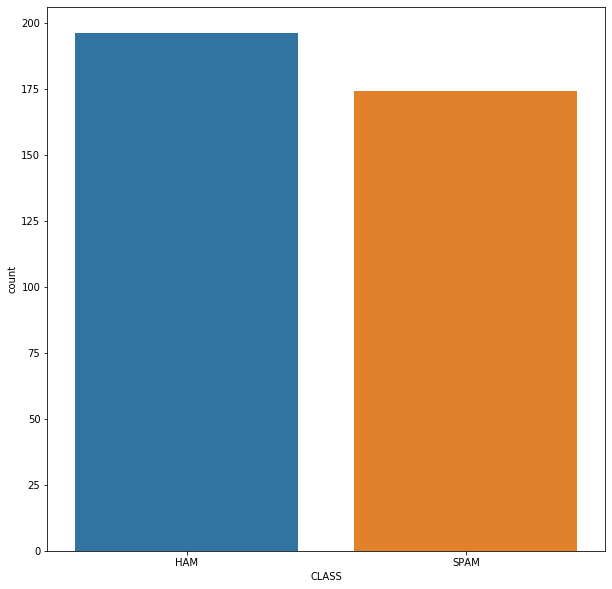

In [74]:
import seaborn as sb
plt.figure(figsize=(10, 10))
sb.countplot(x='CLASS',data=df)


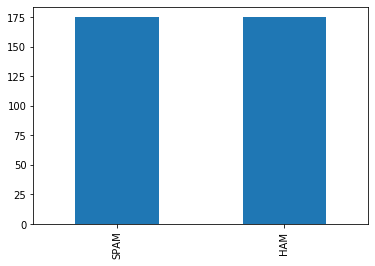

In [75]:
# SPAM HAM COUNT OF PSY VIDEO
df1['CLASS'] = df1['CLASS'].map({0: 'HAM', 1: 'SPAM'})
pd.value_counts(df1['CLASS']).plot.bar()

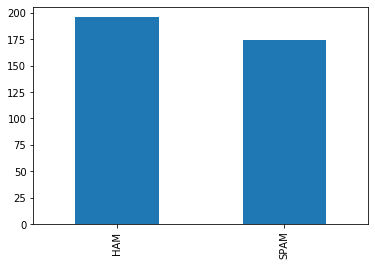

In [76]:
# SPAM HAM COUNT OF KATY PERRY VIDEO
df2['CLASS'] = df2['CLASS'].map({0: 'HAM', 1: 'SPAM'})
pd.value_counts(df['CLASS']).plot.bar()

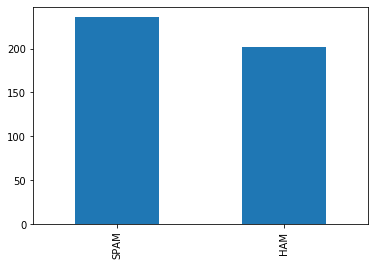

In [77]:
# SPAM HAM COUNT OF LMFAO
df3['CLASS'] = df3['CLASS'].map({0: 'HAM', 1: 'SPAM'})
pd.value_counts(df3['CLASS']).plot.bar()

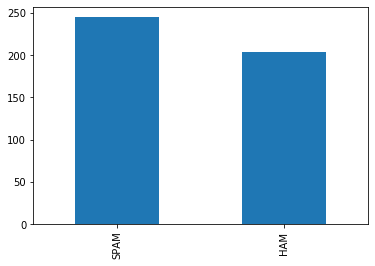

In [78]:
# SPAM HAM COUNT OF EMINEM VIDEO
df4['CLASS'] = df4['CLASS'].map({0: 'HAM', 1: 'SPAM'})
pd.value_counts(df4['CLASS']).plot.bar()

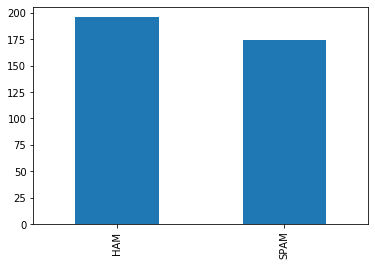

In [79]:
# SPAM HAM COUNT OF SHAKIRA VIDEO
df5['CLASS'] = df5['CLASS'].map({0: 'HAM', 1: 'SPAM'})
pd.value_counts(df5['CLASS']).plot.bar()

In [80]:
import seaborn as sns
figsize(10, 100)
# sns.countplot(y='AUTHOR', data=df, order = df['AUTHOR'].value_counts().index)
df['AUTHOR'].value_counts()
df69= df.groupby(['CLASS','AUTHOR']).count().reset_index()
df69['COUNT']=df69['length']
df69 = df69.drop(['DATE','CONTENT','length'], axis=1)

In [81]:
df69 = df69.sort_values(by =['COUNT', 'CLASS'], ascending = False)
df69

CLASS                                  AUTHOR  processed_content  COUNT
268  SPAM                         Shadrach Grentz                  7      7
0     HAM                                5000palo                  7      7
224  SPAM                             Hidden Love                  5      5
232  SPAM                              James Cook                  4      4
187  SPAM                            Adam Whitney                  3      3
..    ...                                     ...                ...    ...
179   HAM                        Сергей Андреевич                  1      1
180   HAM                            اسيا الخواجة                  1      1
181   HAM                                 น้ำ ริน                  1      1
182   HAM  ‫كيكه وستايلي فيكه كيكه وستايلي فيكه‬‎                  1      1
183   HAM                                     林思鳳                  1      1

[319 rows x 4 columns]

In [20]:
X = df['CONTENT'].fillna('')
y = df['CLASS']
print(X.shape)
print(y.shape)

(370,)
(370,)


In [21]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(277,)
(93,)
(277,)
(93,)


In [22]:
vector = CountVectorizer(stop_words = "english")

In [23]:
X_train_dtm = vector.fit_transform(X_train)

In [24]:
X_test_dtm = vector.transform(X_test)

In [25]:
X_train_dtm.shape, X_test_dtm.shape

((277, 924), (93, 924))

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [27]:
X_train

286                                          Shakira :-*
5                      The best world cup song ever!!!!﻿
137                                      Good times ...﻿
284                                                 Nice
6                                                I love﻿
                             ...                        
38     Love this song! My soccer team made a cd for o...
314    Hello everyone :) I know most of you probably ...
355                                  I love dis song!! 3
231      Haha , Miley Cyrus has done it once again  T...
110                                 Wow...5 years<br />﻿
Name: CONTENT, Length: 277, dtype: object

In [28]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
preds = nb.predict(X_test_dtm)

In [30]:
from sklearn import metrics
metrics.balanced_accuracy_score(y_test, preds)

0.9443413729128014

In [31]:
y_pred_prob = nb.predict_proba(X_test_dtm)

In [32]:
X_train_tokens = vector.get_feature_names()
len(X_train_tokens)

924

In [33]:
print(X_train_tokens[0:20])

['000', '0687119038', '10', '100', '108k', '128gb', '13', '14', '15', '16gb', '17', '18', '19', '1billiom', '1bsefqe', '1hmvtx', '20', '200', '2004', '200mm']


In [34]:
print(X_train_tokens[-20:])

['world', 'worldcup', 'worried', 'wow', 'wrecking', 'write', 'writer', 'wurkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk', 'ww', 'www', 'x3333333333', 'ya', 'yall', 'yea', 'yeah', 'year', 'years', 'youtube', 'youtubers', 'zonepa']


In [35]:
ham_token_count = nb.feature_count_[0, :]
# ham_token_count

In [36]:
# number of times each token appears across all SPAM messages
spam_token_count = nb.feature_count_[1, :]
# spam_token_count

In [37]:
# create a DataFrame of tokens with their separate ham and spam counts
tokens = pd.DataFrame()
tokens['token'] = X_train_tokens
tokens['ham_count'] = ham_token_count
tokens['spam_count'] = spam_token_count
tokens.head()

token  ham_count  spam_count
0         000        5.0         3.0
1  0687119038        0.0         1.0
2          10        0.0         1.0
3         100        0.0         4.0
4        108k        1.0         0.0

In [38]:
# examine 5 random DataFrame rows
# using the sample() method
tokens.sample(20, random_state=42)
test = tokens.sort_values(['spam_count'],ascending = [False])
test

token  ham_count  spam_count
179      check        0.0        65.0
33          39        5.0        57.0
763  subscribe        0.0        36.0
545      money        0.0        32.0
194        com        0.0        31.0
..         ...        ...         ...
743     sounds        1.0         0.0
747     speaks        1.0         0.0
748    special        1.0         0.0
749   spending        1.0         0.0
181     chills        1.0         0.0

[924 rows x 3 columns]

In [39]:
nb.class_count_

array([147., 130.])

In [40]:
tokens['ham_ratio'] = (tokens['ham_count'] + 1) / tokens['ham_count'].sum()
tokens['spam_ratio'] = (tokens['spam_count'] + 1)/ tokens['spam_count'].sum()

In [41]:
tokens.head()

token  ham_count  spam_count  ham_ratio  spam_ratio
0         000        5.0         3.0   0.013015    0.001779
1  0687119038        0.0         1.0   0.002169    0.000889
2          10        0.0         1.0   0.002169    0.000889
3         100        0.0         4.0   0.002169    0.002223
4        108k        1.0         0.0   0.004338    0.000445

In [42]:
tokens['spam_to_ham_ratio'] = tokens['spam_ratio'] / tokens['ham_ratio']
tokens.sort_values('spam_to_ham_ratio', ascending=True)

token  ham_count  spam_count  ham_ratio  spam_ratio  \
221        cup        6.0         0.0   0.015184    0.000445   
21        2015        5.0         0.0   0.013015    0.000445   
499       love       35.0         6.0   0.078091    0.003112   
120        bad        4.0         0.0   0.010846    0.000445   
605    perfect        4.0         0.0   0.010846    0.000445   
..         ...        ...         ...        ...         ...   
194        com        0.0        31.0   0.002169    0.014229   
554      music        0.0        31.0   0.002169    0.014229   
545      money        0.0        32.0   0.002169    0.014673   
763  subscribe        0.0        36.0   0.002169    0.016452   
179      check        0.0        65.0   0.002169    0.029346   

     spam_to_ham_ratio  
221           0.029283  
21            0.034163  
499           0.039857  
120           0.040996  
605           0.040996  
..                 ...  
194           6.559360  
554           6.559360  
545           6.764340  
763           7.584260  
179          13.528679  

[924 rows x 6 columns]

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(df)
print(vectorizer.get_feature_names())

['author', 'class', 'content', 'date', 'length', 'processed_content']


In [45]:
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

nb.fit(X_train_dtm, y_train)
preds = nb.predict(X_test_dtm)
metrics.balanced_accuracy_score(y_test,preds)

0.9455009276437847

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
X_train_dtm = tfidf.fit_transform(X_train)
X_test_dtm = tfidf.transform(X_test)

nb.fit(X_train_dtm, y_train)
preds = nb.predict(X_test_dtm)
metrics.balanced_accuracy_score(y_test,preds)

0.922773654916512

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_dtm,y_train)

C:\Users\asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
predictions = model.predict(X_test_dtm)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [50]:
confusion_matrix(y_test,predictions)

array([[46,  3],
       [ 5, 39]], dtype=int64)

In [51]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

         HAM       0.90      0.94      0.92        49
        SPAM       0.93      0.89      0.91        44

    accuracy                           0.91        93
   macro avg       0.92      0.91      0.91        93
weighted avg       0.91      0.91      0.91        93



# INSIGHT


In [52]:
#1. What are the top reasons for spam comments in Youtube?
test

#The Top 5 words that are treated as spam are "check", "39", "subscribe", "money", "com". With check, its safe to assume that if you try to share a link in a comment, there's a high chance its gonna be treated as spam

token  ham_count  spam_count
179      check        0.0        65.0
33          39        5.0        57.0
763  subscribe        0.0        36.0
545      money        0.0        32.0
194        com        0.0        31.0
..         ...        ...         ...
743     sounds        1.0         0.0
747     speaks        1.0         0.0
748    special        1.0         0.0
749   spending        1.0         0.0
181     chills        1.0         0.0

[924 rows x 3 columns]

In [53]:
# 2. How to avoid getting your comments treated as spam?
tokens.sort_values('ham_ratio', ascending=False)
# One can use unique, extra-ordinary words that aren't usually common. Machines recognizes spam based on frequency of words. So to avoid getting spammed, try to think outside the box.
# LIKE SHAKIRA

token  ham_count  spam_count  ham_ratio  spam_ratio  \
735       song       49.0        10.0   0.108460    0.004891   
499       love       35.0         6.0   0.078091    0.003112   
703    shakira       29.0         6.0   0.065076    0.003112   
130       best       15.0         5.0   0.034707    0.002668   
863       waka       15.0         4.0   0.034707    0.002223   
..         ...        ...         ...        ...         ...   
343    gardner        0.0         1.0   0.002169    0.000889   
344       gave        0.0         2.0   0.002169    0.001334   
345        gen        0.0         1.0   0.002169    0.000889   
346  generated        0.0         1.0   0.002169    0.000889   
923     zonepa        0.0         6.0   0.002169    0.003112   

     spam_to_ham_ratio  
735           0.045096  
499           0.039857  
703           0.047829  
130           0.076867  
863           0.064056  
..                 ...  
343           0.409960  
344           0.614940  
345           0.409960  
346           0.409960  
923           1.434860  

[924 rows x 6 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021184A45848>,
      dtype=object)

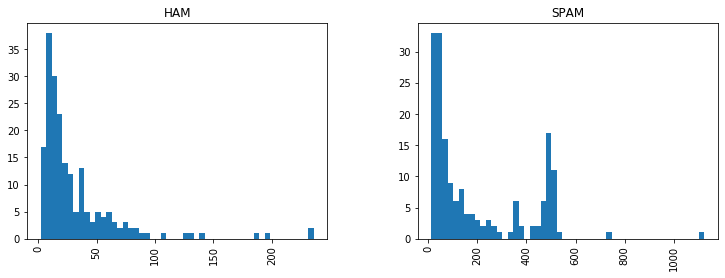

In [54]:
# 3. Relationship of length of comment to SPAM HAM classification?
df.hist(column='length', by='CLASS', bins=50,figsize=(12,4))
# Here we can see that HAM is in the 0-50 range character count 
# For SPAM, we can see that  character count reaches the 500 range
# SPAM comments are relatively longer than HAM comments